In [ ]:
import torch
import torchvision.datasets as datasets
from torchvision import transforms
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# adding '../ocean/src/model/' to sys.path
sys.path.append(os.path.abspath('../../../ocean/src/model/'))

from auto_encoder import VariationalAutoEncoder

In [16]:
# Initialize some constants
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
INPUT_DIM_X = 272 # input image is going to be resized to this size
INPUT_DIM_Y = 160
BATCH_SIZE = 1

# loading the dataset
data_path = '../../data/dataset/psi2/test_set' # setting path
# sequence of transformations to be done
transform = transforms.Compose([transforms.Resize((INPUT_DIM_X, INPUT_DIM_Y)),   # sequence of transformations to be done
                                transforms.Grayscale(num_output_channels=1), # on each image (resize, greyscale,
                                transforms.ToTensor()])                      # convert to tensor)

dataset = datasets.ImageFolder(root=data_path, transform=transform) # read data from folder


# if starting epoch is not 0, load from last trained model
model = VariationalAutoEncoder(latent_dim = 1).to(DEVICE)
model.load_state_dict(torch.load(f'../../models/VAE_1/model_vae_ld_1_end'))

<All keys matched successfully>

In [17]:
x = dataset[503][0].unsqueeze(0)
x = x.to(DEVICE)

print(x.shape)
x1 = model.enc1(x)
print(x1.shape)
x2 = model.enc2(x1)
print(x2.shape)
x3 = model.enc3(x2)
print(x3.shape)
x4 = model.enc4(x3)
print(x4.shape)
x5 = x4.view(x4.size(0), -1)
print(x5.shape)
x6 = model.fc1(x5)

torch.Size([1, 1, 272, 160])
torch.Size([1, 8, 136, 80])
torch.Size([1, 16, 68, 40])
torch.Size([1, 32, 34, 20])
torch.Size([1, 64, 17, 10])
torch.Size([1, 10880])


image index 503
torch.Size([1, 1, 272, 160])
enc1 torch.Size([1, 8, 136, 80])
enc2 torch.Size([1, 16, 68, 40])
enc3 torch.Size([1, 32, 34, 20])
enc4 torch.Size([1, 64, 17, 10])
view torch.Size([1, 10880])
fc1 torch.Size([1, 128])


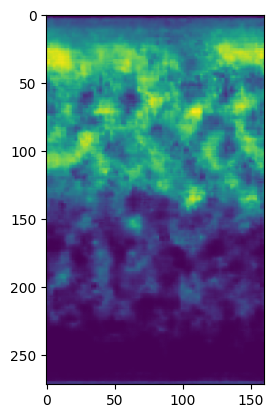

In [24]:
# i = np.random.choice(len(dataset))
i = 503
print(f"image index {i}")
x = dataset[i][0].unsqueeze(0)
print(x.shape)
y = model((x.to(DEVICE)))[0].cpu().detach().numpy()#.cpu()[0].detach().numpy()
y.shape

# plt.imshow(x[0][0])
plt.imshow(y[0][0])

In [ ]:
from torchsummary import summary

summary(model, (1, 272, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1          [-1, 1, 272, 160]               0
            Conv2d-2           [-1, 8, 136, 80]             136
              ReLU-3           [-1, 8, 136, 80]               0
            Conv2d-4           [-1, 16, 68, 40]           2,064
              ReLU-5           [-1, 16, 68, 40]               0
            Conv2d-6           [-1, 32, 34, 20]           8,224
              ReLU-7           [-1, 32, 34, 20]               0
            Conv2d-8           [-1, 64, 17, 10]          32,832
              ReLU-9           [-1, 64, 17, 10]               0
           Linear-10                  [-1, 128]       1,392,768
           Linear-11                    [-1, 5]             645
           Linear-12                    [-1, 5]             645
           Linear-13                [-1, 10880]          65,280
  ConvTranspose2d-14           [-1, 32,